# Importing the libraries

In [ ]:
import numpy as np      # Numerical Python
import pandas as pd      # Data Manipulation
import matplotlib.pyplot as plt     # Data Visualiasation
import seaborn as sns     # Data Visualiasation
import re     # Data Cleaning
from sklearn.linear_model import LinearRegression     # ML Algorithm
from sklearn.metrics import r2_score     # Acuracy Metric
from sklearn.model_selection import train_test_split   # Splitting the Dataset into training & testing dataset
from sklearn.preprocessing import LabelEncoder      # Converting the categorical data to numerical data
import pickle    # Modelling python

# Problem  Statement
You have been given a datasets that describes the Criteria for loan eligibility. Now based on the given dataset Choose an appropriate model for the project to predict the customers who are eligible for the loan and also find out what are the missing criteria why other customers are not eligible for the loan.


# Defining the Dataset
Link : https://drive.google.com/file/d/1Hh1fGH0pyyyfiGnEvDtPn2Q8K8-YgKU_/view?usp=share_link


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Load_Data_set/Training Data.csv')

# EDA - Exploratory Data analysis


In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# Check missing values and replace to null for predict correct data.



In [ ]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace = True)

In [ ]:
df['Married'].fillna(df['Married'].mode()[0],inplace = True)
df['Gender'].fillna(df['Gender'].mode()[0],inplace = True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace = True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace = True)




In [ ]:

df.LoanAmount = df.LoanAmount.fillna(df.LoanAmount.mean())


In [ ]:
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace = True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace = True)


In [ ]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.410423,0.855049
std,6109.041673,2926.248369,84.037468,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [ ]:
pd.crosstab(df['Credit_History'], df['Loan_Status'], margins = True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,110,415,525
All,192,422,614


<Axes: >

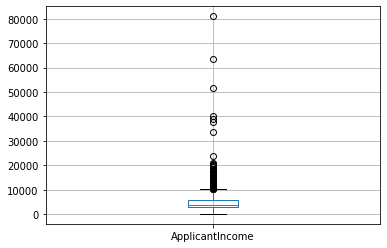

In [ ]:
df.boxplot(column = 'ApplicantIncome')

<Axes: >

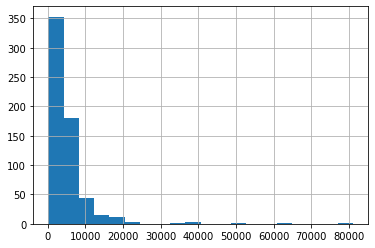

In [ ]:
df['ApplicantIncome'].hist(bins=20)

In [ ]:
df.Loan_Status.unique()

array(['Y', 'N'], dtype=object)

In [ ]:
df.Loan_Status.replace(['Y','N'], [0,1])

0      0
1      1
2      0
3      0
4      0
      ..
609    0
610    0
611    0
612    0
613    1
Name: Loan_Status, Length: 614, dtype: int64

In [ ]:
newdf= df.copy()

In [ ]:
enc = LabelEncoder()

In [ ]:
newdf.Loan_Status

0      Y
1      N
2      Y
3      Y
4      Y
      ..
609    Y
610    Y
611    Y
612    Y
613    N
Name: Loan_Status, Length: 614, dtype: object

In [ ]:
newdf.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [ ]:
newdf.Loan_Status= enc.fit_transform(newdf.Loan_Status)

In [ ]:
newdf.Loan_Status.unique()

array([1, 0])

In [ ]:
newdf.Loan_Status.value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

In [ ]:
df.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N


In [ ]:
newdf.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,0


In [ ]:
df.Loan_Status = enc.fit_transform(df.Loan_Status)

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,1


In [ ]:
df.Loan_Status.unique()

array([1, 0])

In [ ]:
df.Loan_Status.value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

# Observation :     
1. Total number of Gender : 614 , No of Males : 422,No of females : 192
2. None of the columns  contained Null values
3. Convert Loan_Status into (0,1)
4. Column - Dependents,ApplicantIncome, CoapplicantIncome,LoanAmount	Loan_Amount_Term,Credit_History, loan Status having numerical value.
5. Column - Loan_Id , Gender, Married , Self_Employed, Property Area having categorical value.

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,1


In [ ]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status            int64
dtype: object

In [ ]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.410423,0.855049,0.687296
std,6109.041673,2926.248369,84.037468,64.428629,0.352339,0.463973
min,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000,1.000000


In [ ]:
df.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
ApplicantIncome,1.000000,-0.116605,0.565620,-0.046531,-0.018615,-0.004710
CoapplicantIncome,-0.116605,1.000000,0.187828,-0.059383,0.011134,-0.059187
LoanAmount,0.565620,0.187828,1.000000,0.036475,-0.001431,-0.036416
Loan_Amount_Term,-0.046531,-0.059383,0.036475,1.000000,-0.004705,-0.022549
Credit_History,-0.018615,0.011134,-0.001431,-0.004705,1.000000,0.540556
Loan_Status,-0.004710,-0.059187,-0.036416,-0.022549,0.540556,1.000000


<Axes: >

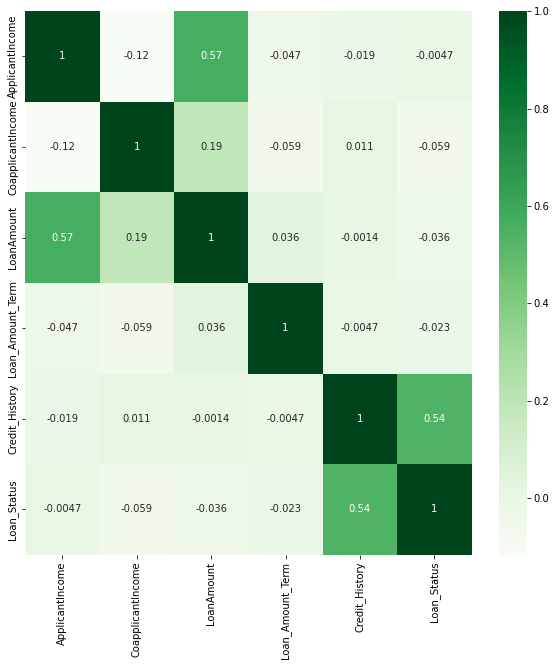

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot = True , cmap = 'Greens')

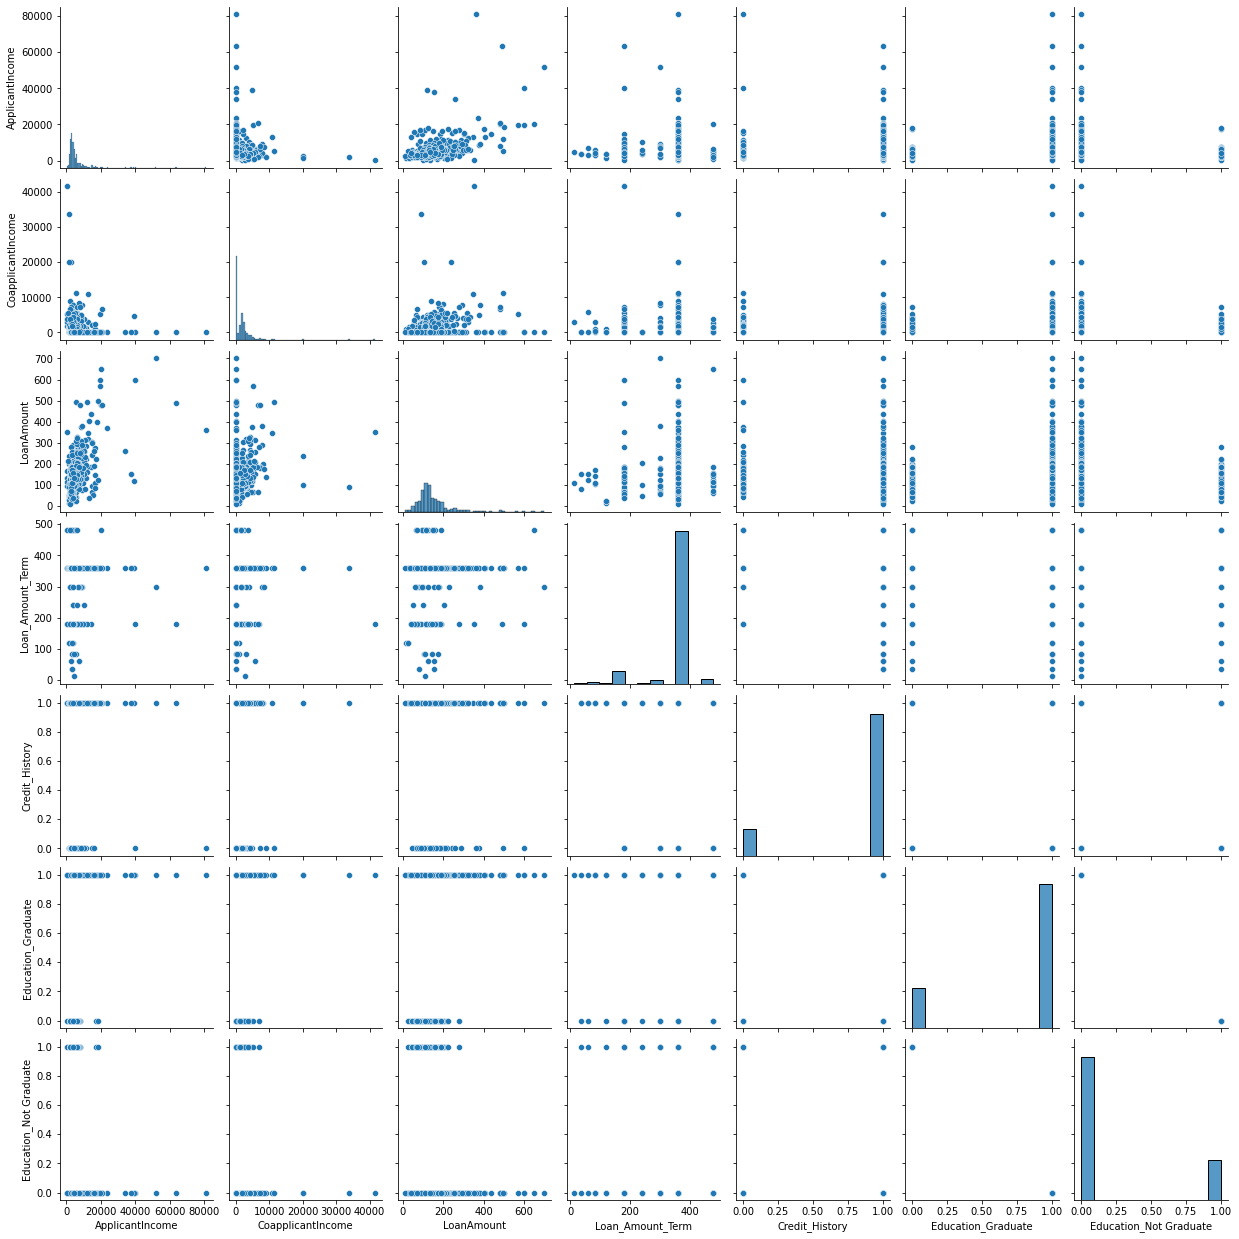

In [ ]:
sns.pairplot(df)

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Education_Graduate,Education_Not Graduate
0,LP001002,Male,No,0,No,5849,0.0,NaN,360.0,1.0,Urban,Y,1,0
1,LP001003,Male,Yes,1,No,4583,1508.0,128.0,360.0,1.0,Rural,N,1,0
2,LP001005,Male,Yes,0,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,1,0
3,LP001006,Male,Yes,0,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,0,1
4,LP001008,Male,No,0,No,6000,0.0,141.0,360.0,1.0,Urban,Y,1,0


# Machine Learning

In [ ]:
x = df.iloc[:,np.r_[1:5,9:11,13:14]].values
y= df.iloc[:,12].values

In [ ]:
x

array([['Male', 'No', '0', ..., 1.0, 'Urban', 0],
       ['Male', 'Yes', '1', ..., 1.0, 'Rural', 0],
       ['Male', 'Yes', '0', ..., 1.0, 'Urban', 0],
       ...,
       ['Male', 'Yes', '1', ..., 1.0, 'Urban', 0],
       ['Male', 'Yes', '2', ..., 1.0, 'Urban', 0],
       ['Female', 'No', '0', ..., 0.0, 'Semiurban', 0]], dtype=object)

In [ ]:
y

array([1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

# Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
x_train , x_test, y_train , y_test = train_test_split(x,y,test_size = 0.2, random_state = 0)

In [ ]:
len(x_train)

491

In [ ]:
len(x_test)

123

In [ ]:
print(x_train)

[['Male' 'Yes' '0' ... 1.0 'Semiurban' 0]
 ['Male' 'No' '1' ... nan 'Semiurban' 0]
 ['Male' 'Yes' '0' ... 0.0 'Rural' 0]
 ...
 ['Male' 'Yes' '3+' ... 1.0 'Semiurban' 0]
 ['Male' 'Yes' '0' ... 1.0 'Urban' 1]
 ['Female' 'Yes' '0' ... 1.0 'Semiurban' 0]]


# Train the Model


In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder_x = LabelEncoder()


In [ ]:
for i in range (0,7):
  x_train[:,i]= labelencoder_x.fit_transform(x_train[:,i])

In [ ]:
x_train

array([[1, 1, 0, ..., 1, 'Semiurban', 0],
       [1, 0, 1, ..., 2, 'Semiurban', 0],
       [1, 1, 0, ..., 0, 'Rural', 0],
       ...,
       [1, 1, 3, ..., 1, 'Semiurban', 0],
       [1, 1, 0, ..., 1, 'Urban', 1],
       [0, 1, 0, ..., 1, 'Semiurban', 0]], dtype=object)

In [ ]:
y_train

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,

In [ ]:
for i in range (0,7):
  x_test[:,i]= labelencoder_x.fit_transform(x_test[:,i])

In [ ]:
x_test

array([[1, 0, 0, 1, 1, 1, 0],
       [0, 0, 0, 0, 1, 1, 0],
       [1, 1, 0, 0, 1, 2, 0],
       [1, 1, 0, 0, 1, 2, 0],
       [1, 1, 2, 0, 1, 1, 0],
       [1, 1, 0, 1, 0, 0, 1],
       [1, 1, 3, 0, 1, 0, 0],
       [1, 0, 0, 2, 1, 1, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 1, 1, 0],
       [0, 0, 0, 0, 1, 1, 0],
       [1, 1, 1, 1, 1, 1, 0],
       [0, 0, 0, 0, 1, 1, 0],
       [1, 1, 2, 0, 1, 1, 0],
       [1, 1, 0, 0, 1, 1, 0],
       [1, 1, 1, 0, 1, 2, 0],
       [1, 0, 1, 1, 2, 1, 1],
       [1, 0, 0, 0, 1, 1, 1],
       [0, 0, 0, 1, 2, 2, 0],
       [1, 1, 0, 0, 0, 2, 1],
       [0, 1, 0, 0, 0, 2, 0],
       [1, 1, 0, 0, 1, 1, 0],
       [1, 1, 2, 1, 1, 0, 0],
       [1, 1, 2, 0, 1, 0, 0],
       [1, 1, 0, 0, 2, 0, 0],
       [1, 1, 1, 0, 1, 1, 0],
       [1, 0, 0, 0, 1, 1, 0],
       [1, 1, 0, 0, 1, 1, 0],
       [1, 1, 3, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 1, 0],
       [1, 1, 0, 0, 1, 1, 0],
       [1, 0, 0, 0, 1, 0, 1],
       [1, 1, 1, 0, 1, 1, 1],
       [1,

In [ ]:
y_test

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1], dtype=uint8)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
ss=StandardScaler()
x_train=ss.fit_transform(x_train)
x_test= ss.fit_transform(x_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DTClassifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
DTClassifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
y_pred = DTClassifier.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1], dtype=uint8)

In [ ]:
from sklearn import metrics
print('The accuracy of decision tree is: ', metrics.accuracy_score(y_pred, y_test))

The accuracy of decision tree is:  1.0


In [ ]:
from sklearn.naive_bayes import GaussianNB
NBClassifier = GaussianNB()
NBClassifier.fit(x_train , y_train)

GaussianNB()

In [ ]:
y_pred = NBClassifier.predict(x_test)

In [ ]:
y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1], dtype=uint8)

In [ ]:
print('The accuracy of naive bayes is: ', metrics.accuracy_score(y_pred, y_test))

The accuracy of naive bayes is:  1.0


# Q.1 What's the ratio of Male to Female?


In [ ]:
total_applicants = len(df['Gender'])


In [ ]:
male_count = len(df[df['Gender'] == 'Male'])
female_count = len(df[df['Gender'] == 'Female'])
ratio_male_female = male_count / total_applicants

In [ ]:
ratio_male_female

0.8175895765472313


 Answer : The ratio of Male to Female 0.7964169381107492

# Q.2  How many Males are married and non-married?

In [ ]:
married_males = len(df[(df['Gender'] == 'Male') & (df['Married'] == 'Yes')])
non_married_males = len(df[(df['Gender'] == 'Male') & (df['Married'] == 'No')])

In [ ]:
married_males

369

In [ ]:
non_married_males

133

  Answer:
  
  Total number of Married males : 357

  Total number of Non_married males : 130

# Q.3 How many Females are married and non-married?


In [ ]:
married_females = len(df[(df['Gender'] == 'Female') & (df['Married'] == 'Yes')])
non_married_females = len(df[(df['Gender'] == 'Female') & (df['Married'] == 'No')])

In [ ]:
married_females

32

In [ ]:
non_married_females

80

  Answer:

Total number of Married Females : 31

Total number of Non_married Females : 80


# Q.4 How many Males and Females are graduated and non-graduated with respect to their Marital status?


In [ ]:
grad_married_males = len(df[(df['Gender'] == 'Male') & (df['Married'] == 'Yes') & (df['Education'] == 'Graduate')])
grad_non_married_males = len(df[(df['Gender'] == 'Male') & (df['Married'] == 'No') & (df['Education'] == 'Graduate')])
non_grad_married_males = len(df[(df['Gender'] == 'Male') & (df['Married'] == 'Yes') & (df['Education'] == 'Not Graduate')])
non_grad_non_married_males = len(df[(df['Gender'] == 'Male') & (df['Married'] == 'No') & (df['Education'] == 'Not Graduate')])


In [ ]:
non_grad_non_married_males

31

In [ ]:
non_grad_married_males

83

In [ ]:
grad_non_married_males

102

In [ ]:
grad_married_males

286

  Answer:


Total no of grad_married_males =  31

Total no of grad_non_married_males = 82

Total no of non_grad_married_males =  99

Total no of non_grad_non_married_males = 275

In [ ]:
grad_married_females = len(df[(df['Gender'] == 'Female') & (df['Married'] == 'Yes') & (df['Education'] == 'Graduate')])
grad_non_married_females = len(df[(df['Gender'] == 'Female') & (df['Married'] == 'No') & (df['Education'] == 'Graduate')])
non_grad_married_females = len(df[(df['Gender'] == 'Female') & (df['Married'] == 'Yes') & (df['Education'] == 'Not Graduate')])
non_grad_non_married_females = len(df[(df['Gender'] == 'Female') & (df['Married'] == 'No') & (df['Education'] == 'Not Graduate')])

In [ ]:
grad_married_females

26

In [ ]:
grad_non_married_females

66

In [ ]:
non_grad_married_females

6

In [ ]:
non_grad_non_married_females

14

Answer:

Total no of grad_married_females = 25

Total no of grad_non_married_females = 66

Total no of non_grad_married_females = 6

Total no of non_grad_non_married_females = 14

# Q.5 Which type of encoding will be required to perform on the "Education" column?


In [ ]:
df = pd.get_dummies(df,columns=['Education'], prefix='Education')


# Q.6  Is it a male or a female whose loan amount is the highest?

In [ ]:
highest_loan_amount = df['LoanAmount'].max()
highest_loan_gender = df.loc[df['LoanAmount'] == highest_loan_amount, 'Gender'].values[0]

In [ ]:
highest_loan_amount

700.0

In [ ]:
highest_loan_gender

'Male'

Answer:

Higest loan amount is 700

Higest loan gender is Nan which is to Loan Id LP001585
and status for this id is "Y"

# Q.7 The specification and information about the applicant who has the highest income?


In [ ]:
highest_income = df['ApplicantIncome'].max()
highest_income_row = df.loc[df['ApplicantIncome'] == highest_income]

In [ ]:
highest_income

81000

In [ ]:
highest_income_row

,Loan_ID,Gender,Married,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Education_Graduate,Education_Not Graduate
409,LP002317,Male,Yes,3+,No,81000,0.0,360.0,360.0,0.0,Rural,0,1,0


# Answer:

Highest income is 81000

Highest income row is 409

# Q.8 What all features are you going to consider for the model training and why? (Give the appropriate reason for choosing such features among others)

According to given training datasets of Loan eligibility test.
In order to predict loan eligibility, we need to consider various factors that can affect it.

such as the Borrower's Financial status:- Ability to repay the loan.

Employment:- If person is having any stable job than he/she can able to repay loan timely.

Education:- It play vital role which reflect a borrower's ability to earn a higher income and better job opportunities, which can impact their ability to repay a loan. and credit history.

Gender: Gender can be an important factor in determining loan eligibility as it can affect factors like income and credit score.

Married: The marital status of an individual can also impact their loan eligibility, as married couples may be seen as more financially stable and they can repay loan amount timely if both are working.


Loan Amount: The loan amount requested can be a factor in determining eligibility, as it indicates the level of risk involved in lending the money.

Loan Amount Term: The length of the loan term can also be a factor in determining eligibility, as it can impact the ability of the borrower to repay the loan.

Credit History: Credit history is an important factor in determining loan eligibility, as it indicates the borrower's ability to repay loans in the past.If credit cibil is good than possibility of repay the loan amount is more than other.


We can choose these features as they are the most relevant and impactful in determining loan eligibility. However, we can also explore other features and perform feature engineering to improve the model's performance.

# Q.9 Which model are you going to choose and define the reason for going with the same model?

For given dataset of Loan eligibility problem Decision Tree Classification is a commonly used and effective model.  Attribute selection measures Entropy & Information gain which use to fetching data which evoluate eligibilty of person for loan.

# Q. 10  Have you performed the Hyper Parameter Tuning?



 No , I have not performing hyper Parameter tuning.
Becuase by using Decision tree classification i have got accurate data.

# Q.11 Compare the Actual results with the Predicted results?



# Testing for Actual value and Predicted value

In [ ]:
y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1], dtype=uint8)

In [ ]:
newdf = pd.DataFrame ({'Actual value': y_test, 'Predicted values': y_pred})

In [ ]:
newdf

,Actual value,Predicted values
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
118,1,1
119,1,1
120,1,1
121,0,0


Text(0.5, 1.0, 'Actual v/s Predicted')

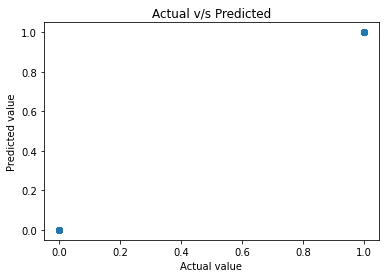

In [ ]:
plt.scatter(newdf['Actual value'], newdf['Predicted values'])
plt.xlabel('Actual value')
plt.ylabel('Predicted value')
plt.title('Actual v/s Predicted')

# Q. 12 What's the accuracy of your model?


As i have user Decision Tree classification algorithm . By which plotting the value and predict the accuracy .and we have compare it by Actual value to Predicted value.

we can calculate the accuracy of the model using the below code.

from sklearn import metrics
print('The accuracy of decision tree is: ', metrics.accuracy_score(y_pred, y_test))

plt.scatter(newdf['Actual value'], newdf['Predicted values'])
plt.xlabel('Actual value')
plt.ylabel('Predicted value')
plt.title('Actual v/s Predicted')


# Q. 13 In order to improve the accuracy, what more approaches can be done?


In [ ]:
We can use NBClassifier predict test.

from sklearn.naive_bayes import GaussianNB
NBClassifier = GaussianNB()
NBClassifier.fit(x_train , y_train)


# Q. 14 What can you conclude with respect to the data?


In above problem i have used Decision Tree modelling. And Predict the data by two algorithm DecisionTreeClassifier and NBClassifier which show me accurate data .
So on give data set i got Actual data and Predicted data is same.
